In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 이미 알고 있는 사실
1. 
2.
3.
4.

In [3]:
# csv 파일 가져오기 
df = pd.read_csv("dataset/creditcard.csv", delimiter=',', dtype=np.float32)

# row 284807, col 31
print(df.shape)

# 데이터 값 확인 
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


대체적으로 V1~ V28 데이터는 음수/ 양수 비율이 비슷하며


In [6]:
# 데이터 분포 확인하기 
distribution = pd.DataFrame( {"min": [ df[col].min() for col in df.columns],   # 최소값
                            "max": [ df[col].max() for col in df.columns],     # 최대값
                            "mean": [ df[col].mean() for col in df.columns],   # 평균값
                            "std": [ df[col].std() for col in df.columns],     # 표준 편차
                            "vars": [ df[col].var() for col in df.columns],    # 분산
                            "median": [ df[col].median() for col in df.columns],    # 중앙값
                            #"mode": [ df[col].mode(dropna=False) for col in df.columns],    # 최빈값
                            "minus_cnt" : [ len(list(filter(lambda x : x < 0 , df[col]))) for col in df.columns], # 음수 개수
                            "plus_cnt" : [ len(list(filter(lambda x : x > 0. , df[col]))) for col in df.columns], # 양수 개수
                            "zero_cnt" : [ len(list(filter(lambda x : x == 0. , df[col]))) for col in df.columns] # 0 개수
                            },
    index=[df.columns],
)
print(distribution)


               min            max          mean           std          vars  \
Time      0.000000  172792.000000  9.481387e+04  47488.144531  2.255124e+09   
V1      -56.407509       2.454930  1.339397e-08      1.958696  3.836489e+00   
V2      -72.715729      22.057730  0.000000e+00      1.651309  2.726820e+00   
V3      -48.325588       9.382559 -4.800400e-08      1.516255  2.299029e+00   
V4       -5.683171      16.875343  6.643411e-09      1.415869  2.004684e+00   
V5     -113.743309      34.801666  2.657364e-08      1.380247  1.905081e+00   
V6      -26.160505      73.301628 -1.500125e-09      1.332271  1.774946e+00   
V7      -43.557243     120.589493 -1.071518e-09      1.237094  1.530401e+00   
V8      -73.216721      20.007208 -1.071518e-10      1.194353  1.426479e+00   
V9      -13.434067      15.594995 -3.214554e-10      1.098632  1.206993e+00   
V10     -24.588263      23.745136 -4.071768e-09      1.088850  1.185594e+00   
V11      -4.797473      12.018913  7.714928e-09     

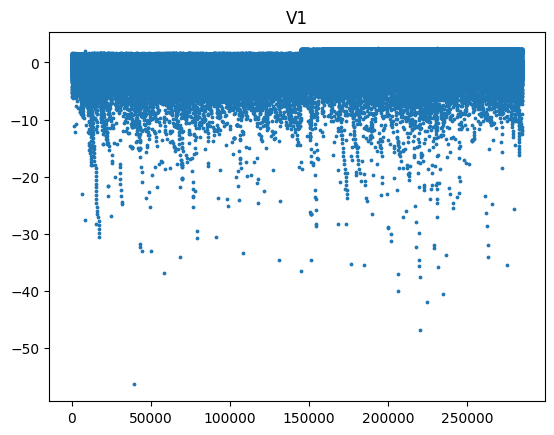

In [10]:

# 데이터 분포 그래프로 확인
for colname in df.columns:
    x_values = list(range(0, df.shape[0]))
    y_values = df[colname] 
    plt.title(colname)
    plt.scatter(x_values, y_values, s=3)
    plt.show()
    break



In [85]:
print(df["Class"].value_counts())

Class
0.0    284315
1.0       492
Name: count, dtype: int64


In [8]:
df.drop(columns = "Time", inplace=True)
df.head()

x_data = df.iloc[:,0:-1].values
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

#  / validation set / test set / 


(284807, 29) (284807, 1)


In [9]:
# 정규화 방법 선택 
# 아직은 없음 

#1	StandardScaler	기본 스케일. 평균과 표준편차 사용
#2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
#3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
#4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)


[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


# Parameter Initialize

In [7]:
tf.random.set_seed(22)


print(tf.random.normal([29,1], mean=0.0))

#W = tf.Variable(tf.random.normal([29,1], mean=0.0))
#b = tf.Variable(tf.random.normal([1], mean=0.0))

tf.Tensor(
[[-7.25827217e-01]
 [ 1.01235020e+00]
 [-7.51985192e-01]
 [-8.88580263e-01]
 [-2.07847428e+00]
 [ 1.37396738e-01]
 [ 2.47446105e-01]
 [-4.23506588e-01]
 [-1.51147079e+00]
 [-3.99760604e-01]
 [-6.80096090e-01]
 [-1.16227120e-01]
 [-2.46882170e-01]
 [-4.06505108e-01]
 [ 7.40994513e-01]
 [ 1.00182116e+00]
 [-6.57091010e-03]
 [-1.21994078e+00]
 [-8.22737038e-01]
 [-2.09685326e+00]
 [ 8.57781291e-01]
 [-1.02730989e+00]
 [ 1.23376822e+00]
 [ 3.70236225e-02]
 [ 6.32507652e-02]
 [-1.21721305e-01]
 [ 9.34411049e-01]
 [ 6.11908995e-02]
 [-9.29663889e-04]], shape=(29, 1), dtype=float32)
